# Źródła:

1.   https://deap.readthedocs.io/en/master/overview.html
2.   https://deap.readthedocs.io/en/master/installation.html
3.   https://deap.readthedocs.io/en/master/tutorials/basic/part1.html
4.   https://deap.readthedocs.io/en/master/tutorials/basic/part2.html
5.   https://deap.readthedocs.io/en/master/tutorials/basic/part3.html
6.   https://deap.readthedocs.io/en/master/api/index.html
7.   https://www.w3schools.com/python/module_random.asp
8.   https://pandas.pydata.org/docs/reference/index.html
9.   https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
10.  https://numpy.org/doc/stable/reference/index.html#reference
11.  https://www.wolframalpha.com/




In [67]:
# Instalacja biblioteki DEAP

!pip install deap


# Importy:

## Biblioteka DEAP

*   **base** - Moduł w bibliotece DEAP, który dostarcza podstawowe klasy i funkcje do definiowania struktur danych, takich jak osobniki i populacje, w algorytmach ewolucyjnych.

*   **creator** - Moduł w bibliotece DEAP, który umożliwia tworzenie niestandardowych typów danych, takich jak klasy reprezentujące osobniki z dodatkowymi atrybutami, w celu dostosowania algorytmu ewolucyjnego do specyficznych potrzeb.

*   **tools** - Moduł w bibliotece DEAP, który zawiera funkcje wspomagające, takie jak selekcja, krzyżowanie i mutacja, które są wykorzystywane w algorytmach ewolucyjnych do manipulowania populacjami i ich osobnikami.

*   **algorithms** - Moduł w bibliotece DEAP, który zawiera gotowe implementacje popularnych algorytmów ewolucyjnych, takich jak eaMuPlusLambda i eaMuCommaLambda oraz mniejsze części algorytmów, które mogą zostać użyte do budowania złożonych eksperymentów.

## Materiały Pomocnicze

*   **random** - Moduł w Pythonie, który pozwala np. na generowanie losowych liczb, czy wybieranie losowych elementów z kolekcji.

*   **pandas** - Biblioteka w Pythonie, która oferuje wydajne struktury danych, takie jak DataFrame i Series, umożliwiające łatwe manipulowanie i analizowanie danych w formie tabelarycznej.

*   **matplotlib.pyplot** - Moduł w bibliotece Matplotlib, który dostarcza funkcje do tworzenia wykresów i wizualizacji danych w Pythonie, umożliwiając łatwe rysowanie różnych typów grafiki, takich jak linie, słupki, wykresy kołowe czy histogramy.

*   **numpy** - Biblioteka w Pythonie, która zapewnia wszechstronną obsługę dużych, wielowymiarowych tablic oraz macierzy, a także oferuje funkcje matematyczne i algorytmy do ich efektywnego przetwarzania.

In [68]:
# Inicjacja niezbędnych bibliotek

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

# Przykład 1
**Maksymalizacja funkcji kwadratowej: f(x) = x^2 na przedziale [-10;10]**
## Rozwiązanie:
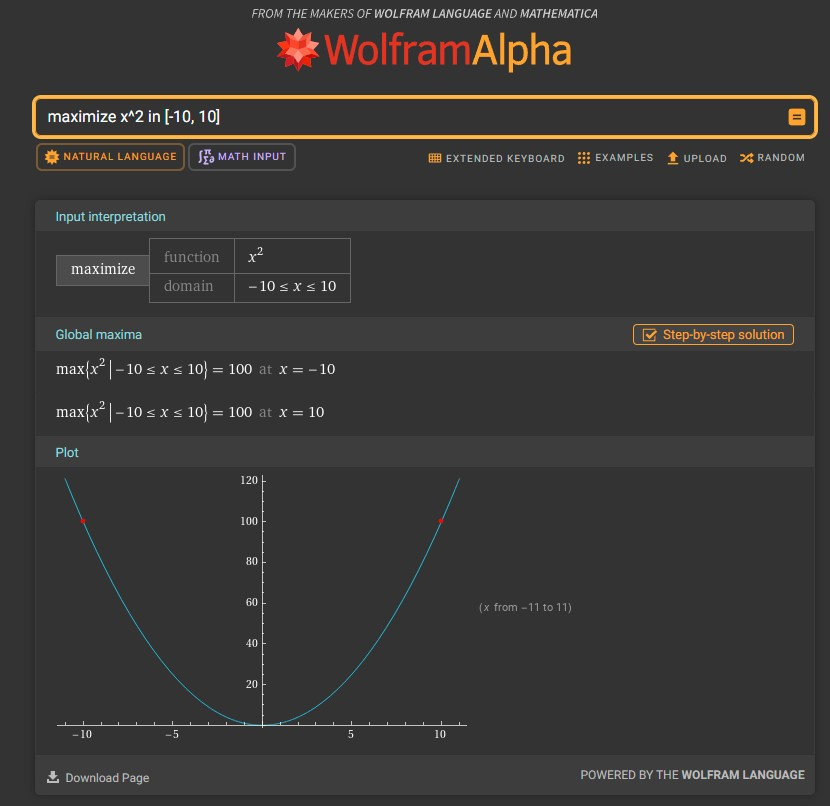

In [69]:
# Definicja dolnego oraz górnego zakresu przedziału

LOWER_BOUND = -10
UPPER_BOUND = 10

# Definicja funkcji przystosowania

def evaluate_first_exercise(individual):
    x = individual[0]
    return (x**2,)

# Definicja funkcji ograniczającej wartość do zadanego przedziału

def check_bounds(individual):
    individual[0] = min(max(individual[0], LOWER_BOUND), UPPER_BOUND)

# Utworzenie pojedynczej jednostki w populacji

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("IndividualFirstExercise", list, fitness=creator.FitnessMax)

# Utworzenie populacji, w której w skład wchodzą powyższe jednostki

toolbox = base.Toolbox()
toolbox.register("attr_float_first_exercise", random.uniform, LOWER_BOUND, UPPER_BOUND)
toolbox.register("individual_first_exercise", tools.initRepeat, creator.IndividualFirstExercise, toolbox.attr_float_first_exercise, n=1)
toolbox.register("population_first_exercise", tools.initRepeat, list, toolbox.individual_first_exercise)


# Utworzenie list do zapisu statystyk oraz osobników dla każdej generacji

gen_population = []
gen_numbers = []
min_values = []
avg_values = []
max_values = []


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualFirstExercise' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [70]:
# Rejestracja operatorów genetycznych

toolbox.register("mate_first_exercise", tools.cxBlend, alpha=0.5)
toolbox.register("mutate_first_exercise", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select_first_exercise", tools.selTournament, tournsize=3)
toolbox.register("evaluate_first_exercise", evaluate_first_exercise)

In [71]:
# Inicjalizacja populacji

population = toolbox.population_first_exercise(n=10)

# Definicja parametrów algorytmu

NGEN = 10
CXPB, MUTPB = 0.5, 0.2

In [72]:
# Proces ewolucji z rejestracją statystyk

for gen in range(NGEN):

    # Ocena przystosowania populacji

    fitnesses = list(map(toolbox.evaluate_first_exercise, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Zbieranie statystyk generacji

    fitness_array = np.array([ind.fitness.values[0] for ind in population])
    gen_population.append([ind[0] for ind in population])
    gen_numbers.append(gen)
    min_values.append(np.min(fitness_array))
    avg_values.append(np.mean(fitness_array))
    max_values.append(np.max(fitness_array))

    # Selekcja

    offspring = toolbox.select_first_exercise(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Krzyżowanie i mutacja z ograniczeniem zakresu

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate_first_exercise(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
        check_bounds(child1)
        check_bounds(child2)

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate_first_exercise(mutant)
            del mutant.fitness.values
        check_bounds(mutant)

    # Ewaluacja nowych osobników

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate_first_exercise, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Uaktualnienie populacji

    population[:] = tools.selBest(population + offspring, len(population))

In [73]:
# Wizualizacja wyników: Najlepszy wynik

best_ind = tools.selBest(population, 1)[0]
print("Najlepsze rozwiązanie:", best_ind[0])
print("Wartość funkcji:", best_ind.fitness.values[0])

Najlepsze rozwiązanie: 10
Wartość funkcji: 100.0


In [74]:
# Wizualizacja wyników: Tabela

# Konwersja statystyk oraz danych poszczególnych generacji do DataFrame i wizualizacja

# Przypisanie statystyk ogólnych dla poszczególnej generacji

log_df = pd.DataFrame({
    "Generacja": gen_numbers,
    "Średnia": avg_values,
    "Maksimum": max_values,
    "Minimum": min_values
})

print("Ogólne statystyki:\n{}".format(log_df))

# Przypisanie precyzyjne wartości każdego osobnika dla danej generacji

gen_dfs = []

print("Precyzyjne wartości każdego osobnika dla danej generacji: ")

for i in range(len(gen_numbers)):
    gen_dfs.append(
        pd.DataFrame({
            "Generacja": [gen_numbers[i]] * len(gen_population[i]),
            "Osobnik": gen_population[i],
            "Fitness": [evaluate_first_exercise([x])[0] for x in gen_population[i]]
        })
    )
    print("Generacja nr {}:\n{}\n".format(i, gen_dfs[i]))

Ogólne statystyki:
   Generacja     Średnia    Maksimum     Minimum
0          0   38.787525   89.839962    0.071739
1          1   76.166600  100.000000   32.668374
2          2   95.685550  100.000000   89.419159
3          3  100.000000  100.000000  100.000000
4          4  100.000000  100.000000  100.000000
5          5  100.000000  100.000000  100.000000
6          6  100.000000  100.000000  100.000000
7          7  100.000000  100.000000  100.000000
8          8  100.000000  100.000000  100.000000
9          9  100.000000  100.000000  100.000000
Precyzyjne wartości każdego osobnika dla danej generacji: 
Generacja nr 0:
   Generacja   Osobnik    Fitness
0          0 -5.715625  32.668374
1          0  3.947442  15.582297
2          0  5.082992  25.836811
3          0 -8.100618  65.620011
4          0 -4.747650  22.540183
5          0  5.262042  27.689089
6          0  4.886127  23.874232
7          0  9.478394  89.839962
8          0  9.173470  84.152558
9          0 -0.267841   0.

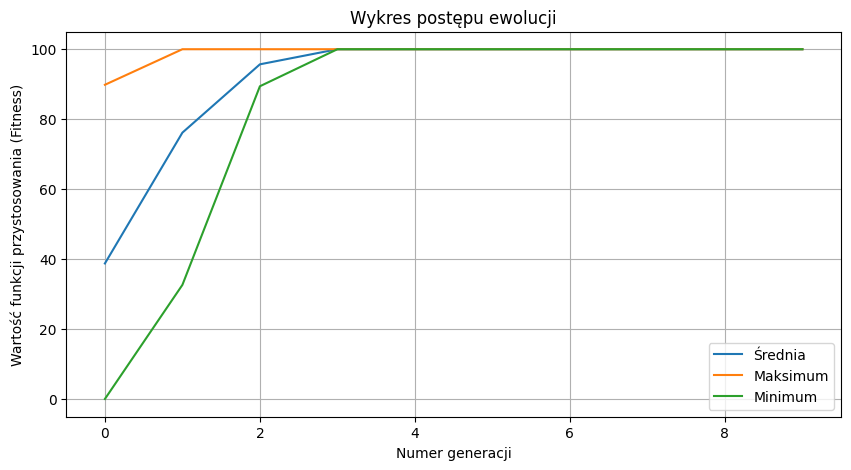

In [75]:
# Wizualizacja wyników: Wykres

# Ogólne statystyki

plt.figure(figsize=(10, 5))
plt.plot(log_df["Generacja"], log_df["Średnia"], label="Średnia")
plt.plot(log_df["Generacja"], log_df["Maksimum"], label="Maksimum")
plt.plot(log_df["Generacja"], log_df["Minimum"], label="Minimum")
plt.title("Wykres postępu ewolucji")
plt.xlabel("Numer generacji")
plt.ylabel("Wartość funkcji przystosowania (Fitness)")
plt.legend(loc='lower right')
plt.xlim(-0.5, 9.5)
plt.ylim(-5, 105)
plt.grid(True)
plt.show()

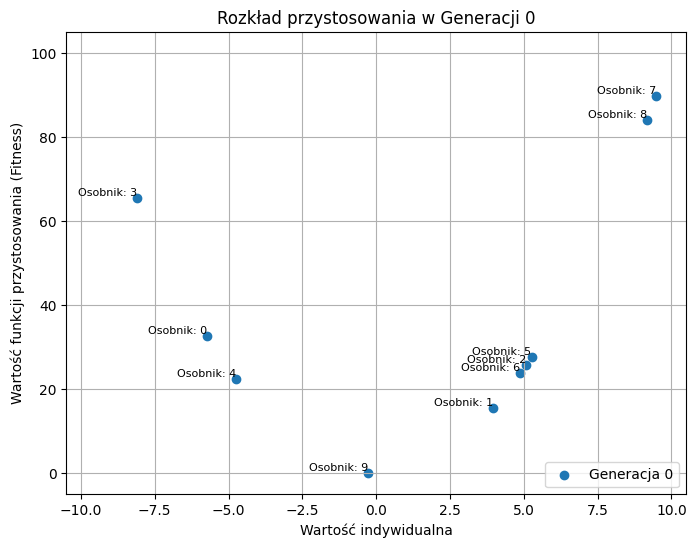

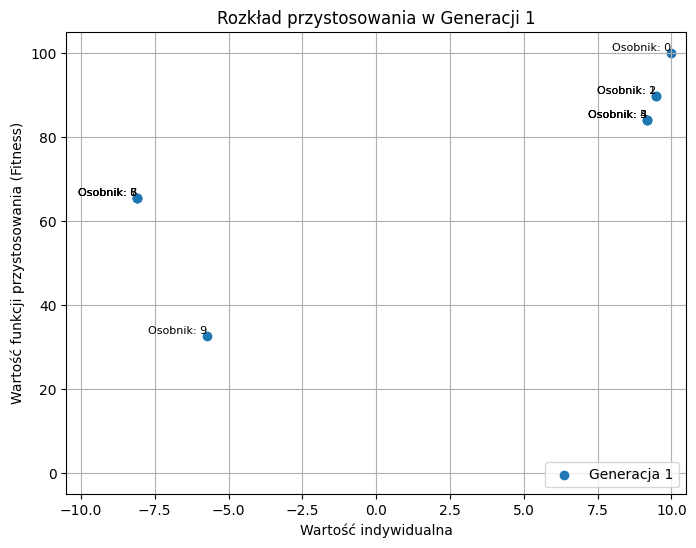

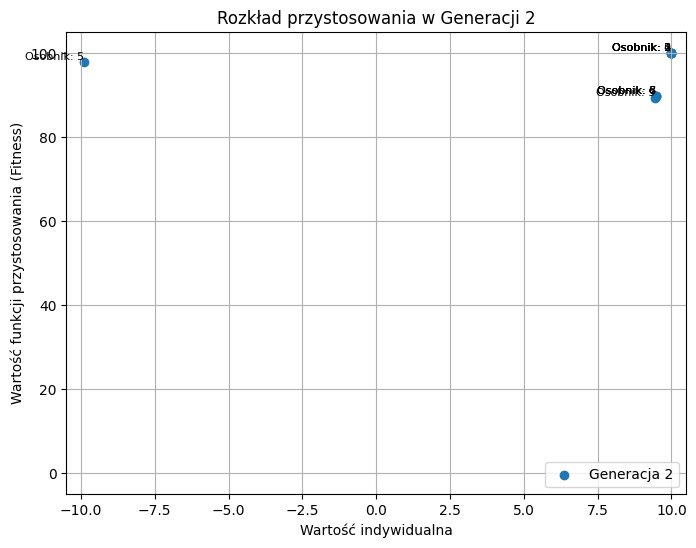

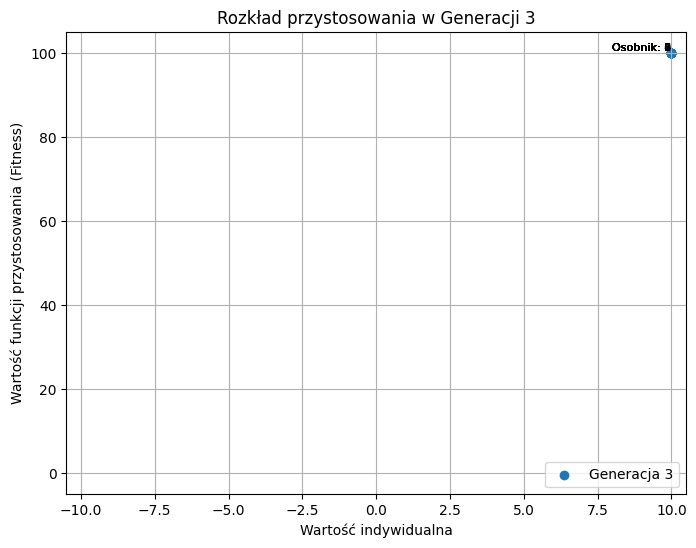

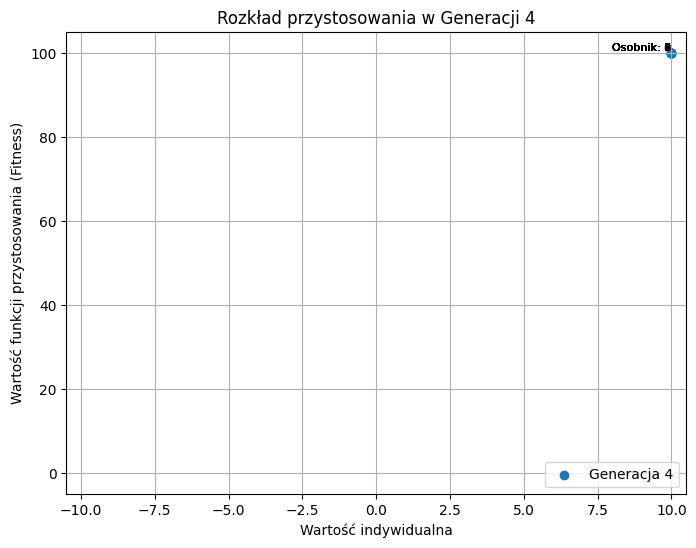

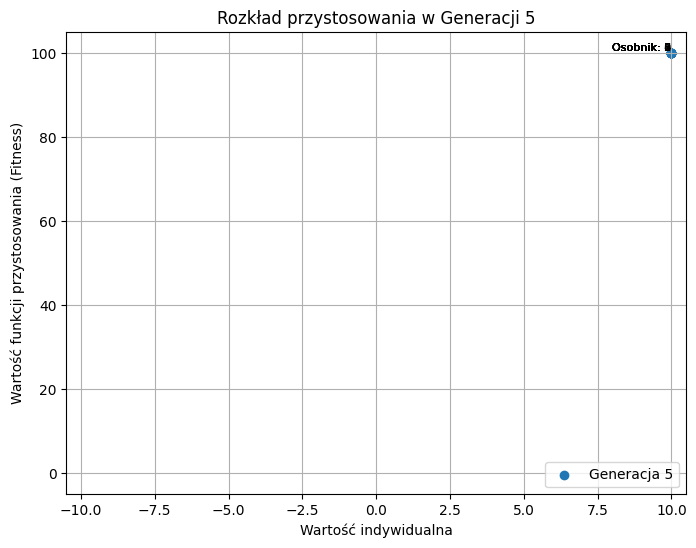

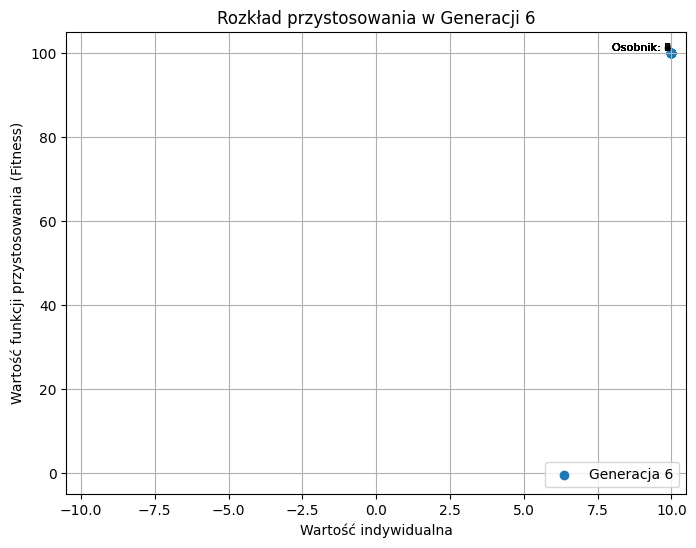

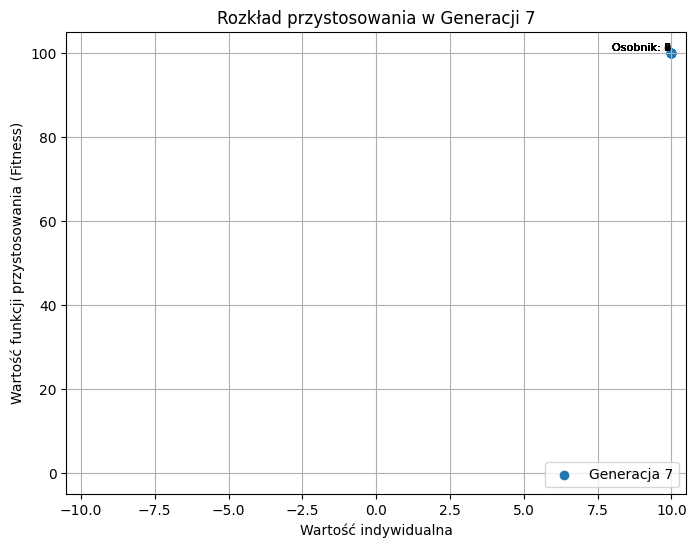

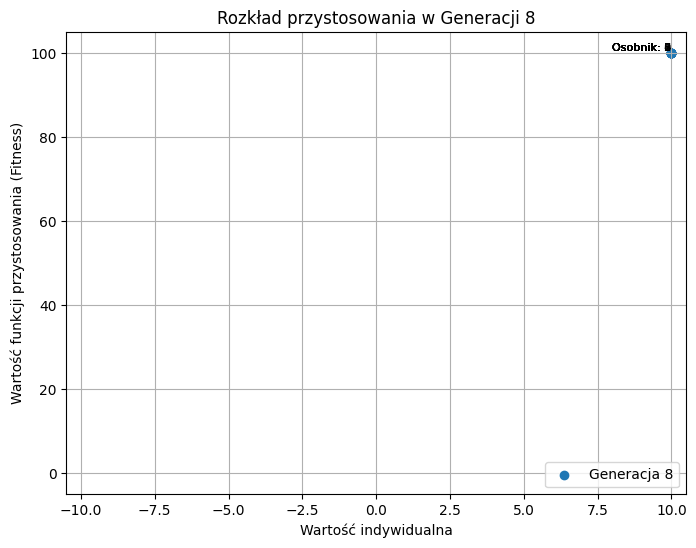

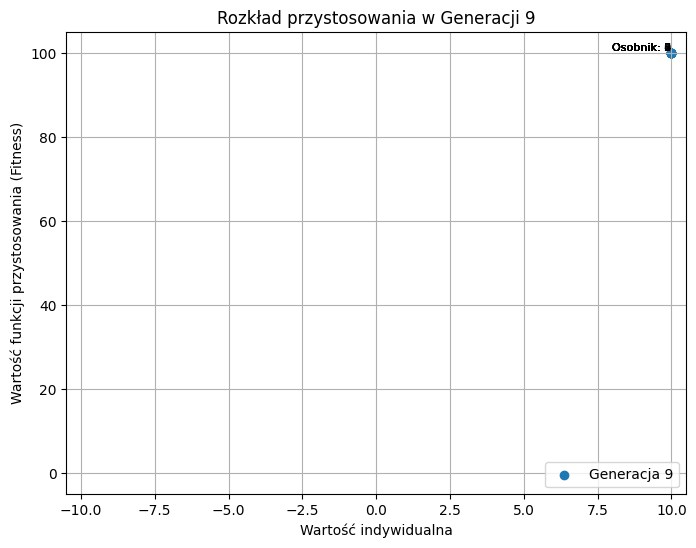

In [76]:
# Wizualizacja wyników: Wykres

# Każdy osobnik dla danej generacji

for i, gen_df in enumerate(gen_dfs):
    plt.figure(figsize=(8, 6))
    plt.scatter(gen_df["Osobnik"], gen_df["Fitness"], label=f"Generacja {i}")
    plt.title(f"Rozkład przystosowania w Generacji {i}")
    plt.xlabel("Wartość indywidualna")
    plt.ylabel("Wartość funkcji przystosowania (Fitness)")
    plt.legend(loc='lower right')
    plt.xlim(-10.5, 10.5)
    plt.ylim(-5, 105)
    plt.grid(True)

    # Dodanie etykiet dla każdego osobnika

    for idx, row in gen_df.iterrows():
        plt.text(row["Osobnik"], row["Fitness"], f"Osobnik: {idx}", fontsize=8, ha='right', va='bottom')

    plt.show()

# Przykład 2
**Minimalizacji funkcji f(x,y) = (x + 2 y - 7)^2 + (2 x + y - 5)^2, Wartości początkowe: [-100, 100]**
## Rozwiązanie:
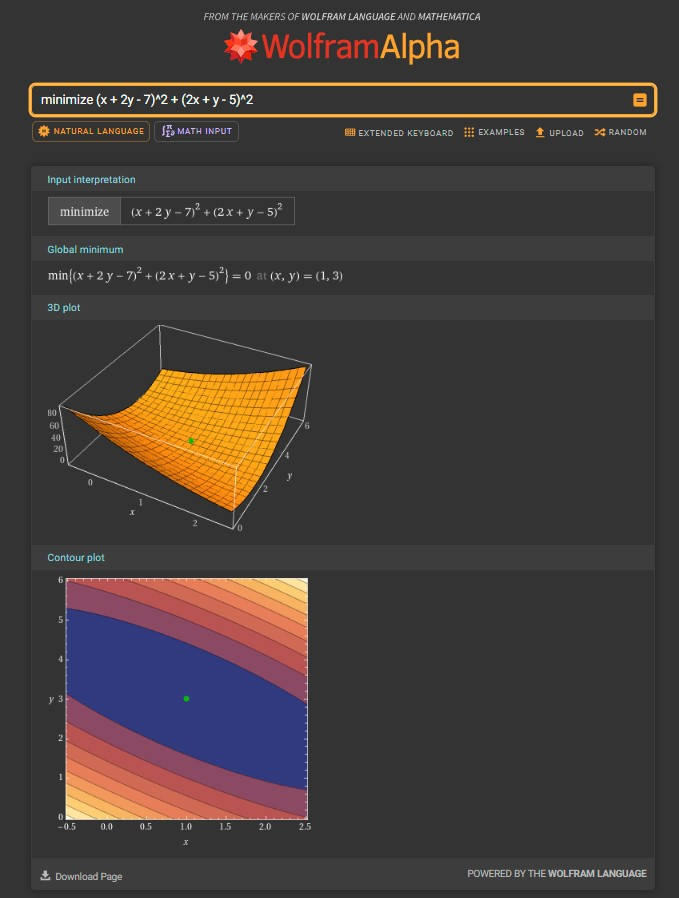

# Sposób 1:
## Skorzystanie z gotowego algorytmu ewolucyjnego zaoferowanego przez bilbiotekę DEAP: **eaSimple**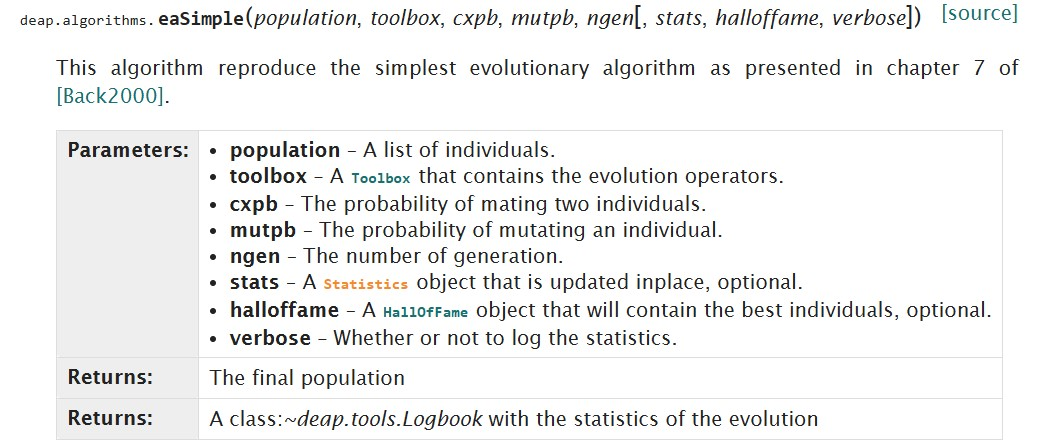

In [77]:
# Funkcja Przystosowania z funkcją z przykładu drugiego
def evaluate_second_exercise(individual):
    x, y = individual
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2,

In [78]:
# Funkcja tworząca wykres na podstawie danego Logbook
def create_plot(logbook):
  log_df = pd.DataFrame(logbook)

  plt.figure(figsize=(12, 6))
  plt.plot(log_df["gen"], log_df["mean"], label="Średnia", color="blue")
  plt.plot(log_df["gen"], log_df["min"], label="Minimum", color="green")
  plt.plot(log_df["gen"], log_df["max"], label="Maksimum", color="red")
  plt.xlabel("Generacja")
  plt.ylabel("Wartość funkcji przystosowania")
  plt.title("Wartość funkcji przystosowania dla poszczególnych generacji")
  plt.legend()
  plt.show()

In [79]:
# Funkcja wypisująca najlepszego osobnika ze wszystkich generacji wraz z odpowiadającą mu wartością funkcji przystosowania
def print_the_best_individual(best_individual):
  print(f"Najlepsze rozwiązanie (eaSimple): {best_individual}, Wartość funkcji przystosowania: {best_individual.fitness.values[0]}")

In [80]:
# Rejestracja narzędzi do utworzenia osobnika oraz całej populacji wraz z operatorami działań ewolucyjnych
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualSecond", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float_second_exercise", random.uniform, -100, 100)
toolbox.register("individual_second_exercise", tools.initRepeat, creator.IndividualSecond, toolbox.attr_float_second_exercise, n=2)
toolbox.register("population_second_exercise", tools.initRepeat, list, toolbox.individual_second_exercise)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_second_exercise)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualSecond' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [81]:
# Statystyki do przechowywania danych ogólnych dla każdej generacji oraz najlepszego osobnika
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("mean", np.mean)
stats.register("max", np.max)
hof = tools.HallOfFame(1)

In [82]:
# Algorytm ewolucyjny z przedwczesnym utworzeniem populacji i użytym eaSimple
population = toolbox.population_second_exercise(n=50)
_ , logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=25, stats=stats, halloffame=hof, verbose=False)

In [83]:
# Wydrukowanie najlepszego rozwiązania
print_the_best_individual(hof[0])

Najlepsze rozwiązanie (eaSimple): [0.47961672470307315, 3.608086922668689], Wartość funkcji przystosowania: 0.6713361777786746


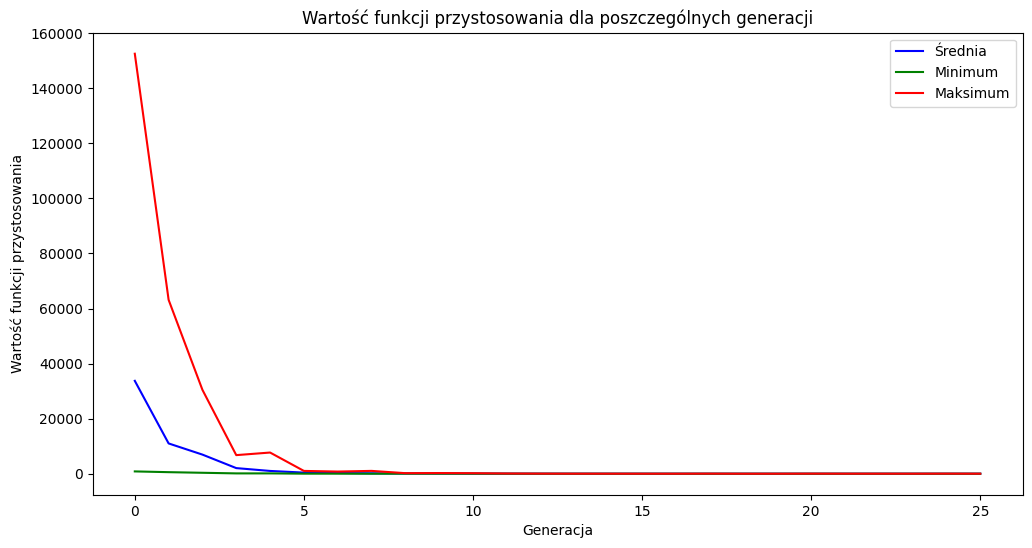

In [84]:
# Utworzenie wykresu statystyk ze sposobu 1
create_plot(logbook)

# Sposób 2:
## Skorzystanie z gotowych mniejszych rozwiązań algorytmów ewolucyjnych zaoferowanego przez bilbiotekę DEAP: **varAnd**
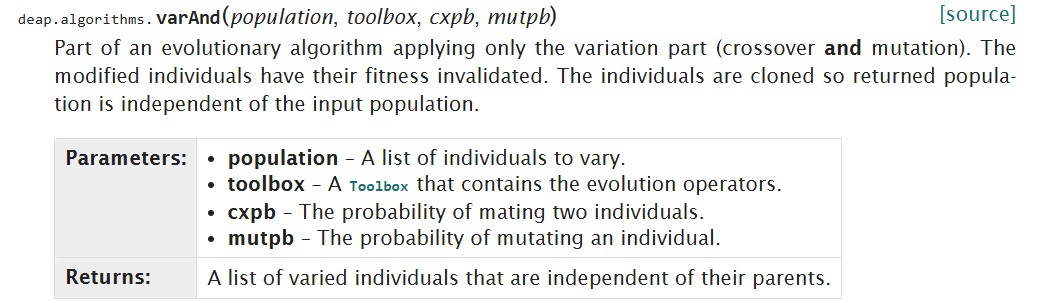

In [94]:
# Statystyki do przechowywania danych ogólnych dla każdej generacji oraz najlepszego osobnika
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("mean", np.mean)
stats.register("max", np.max)
hof = tools.HallOfFame(1)
logbook = tools.Logbook()

In [95]:
# Algorytm ewolucyjny z przedwczesnym utworzeniem populacji i z zastosowanym varAnd do operacji genetycznych wyboru oraz mutacji
population = toolbox.population_second_exercise(n=50)

for gen in range(25):
    # Ocena przystosowania populacji
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)

    # Ewaluacja nowych osobników (tylko tych, którzy nie byli oceniani)
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Ręczna selekcja (wybieramy najlepszych z rodziców i potomków)
    population[:] = tools.selBest(population + offspring, len(population))

    # Zbieranie statystyk
    record = stats.compile(population)
    logbook.record(gen=gen, **record)

    # Aktualizacja najlepszego osobnika
    hof.update(population)

In [96]:
# Wydrukowanie najlepszego rozwiązania
print_the_best_individual(hof[0])

Najlepsze rozwiązanie (eaSimple): [4.271114724489976, -0.1170299052256838], Wartość funkcji przystosowania: 20.511035496957213


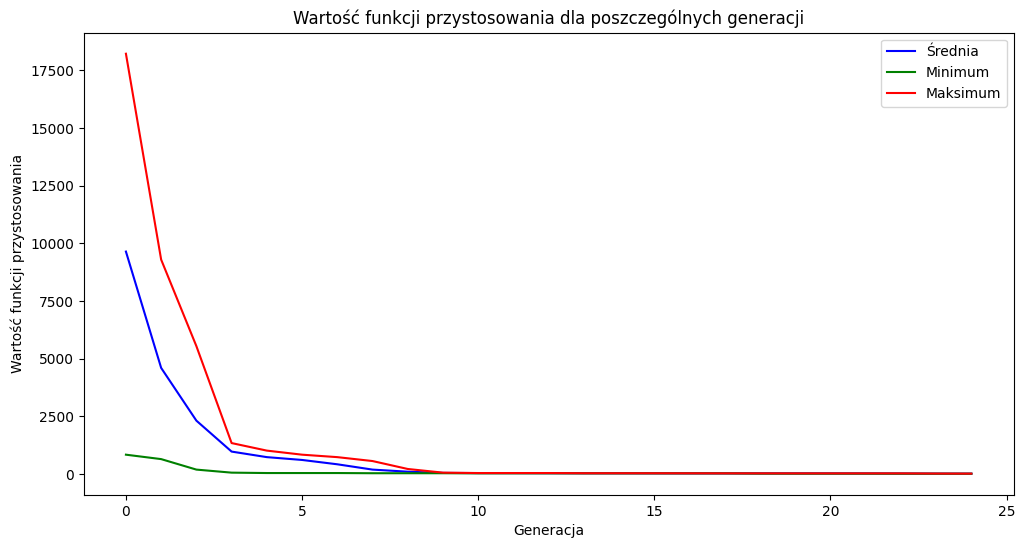

In [97]:
# Utworzenie wykresu statystyk ze sposobu 2
create_plot(logbook)